In [56]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os.path
import random
from glob import glob
import datasets

In [57]:
#path = '/Users/hkerner/data/mcam_novelty/experiments/nb/train=mcam_thumb_sol3-1666_Rtypical_stride16_fliplr_333_test=typical_train_orig'
path = '/Users/hkerner/data/mcam_novelty/alad-R1-encR0.4-l1-F0-D1'
# Load the test data products
inputs, files = datasets.load_6f_images(path=os.path.join(path, 'inputs'), remove_striped=False, shuffle=False)
reconstructions, files = datasets.load_6f_images(path=os.path.join(path, 'reconstructions'), remove_striped=False, shuffle=False)
error_maps, files = datasets.load_6f_images(path=os.path.join(path, 'error_maps'), remove_striped=False, shuffle=False)

# load the bottleneck maps
# files = glob(os.path.join(path, 'encodings', '*.npy'))
# encodings = np.ndarray([len(files), 16, 16, 3])
# for i, f in enumerate(files):
#     encodings[i] = np.load(f)
# print('Loaded dataset with shape:', encodings.shape)
# load the encodings for GAN
files = glob(os.path.join(path, 'encodings', '*.npy'))
encodings = np.ndarray([len(files), 100])
for i, f in enumerate(files):
    encodings[i] = np.load(f)
print('Loaded dataset with shape:', encodings.shape)

('Loaded dataset with shape:', (822, 64, 64, 6))
('Loaded dataset with shape:', (822, 64, 64, 6))
('Loaded dataset with shape:', (822, 64, 64, 6))
('Loaded dataset with shape:', (822, 100))


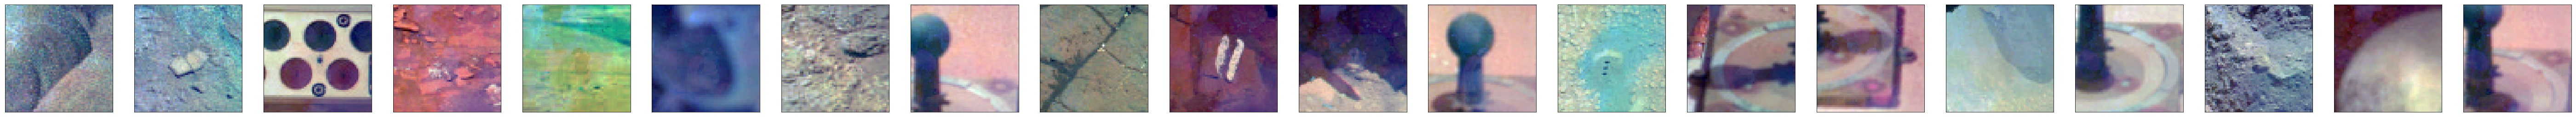

In [61]:
# Visualize the first N inputs
N=20
fig, axes = plt.subplots(ncols=N, figsize=(30, 20))
for i, img in enumerate(inputs[:N]):
    img = np.take(img, [2,0,1], axis=2)
    axes[i].imshow(np.interp(img, (img.min(), img.max()), (0, 1)))
    axes[i].grid(False)
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])

In [52]:
# Visualize the corresponding bottlenecks
# fig, axes = plt.subplots(ncols=N, figsize=(30, 20))
# for i, img in enumerate(encodings[:N]):
#     img = np.take(img, [2,0,1], axis=2)
#     axes[i].imshow(np.interp(img, (img.min(), img.max()), (0, 1)))
#     axes[i].grid(False)
#     axes[i].get_xaxis().set_ticks([])
#     axes[i].get_yaxis().set_ticks([])
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca.fit(encodings)
# pca.explained_variance_ratio_
# encoded_pca = pca.fit_transform(encodings)
# print(pca.explained_variance_ratio_)
# plt.scatter(encoded_pca[:,0], encoded_pca[:,1])

print(np.mean(encodings))
print(np.median(encodings))
print(np.min(encodings))
print(np.max(encodings))

2.1784841077831317e+267
1.3149328827857971
-534.8355712890625
2.2383924207471533e+271


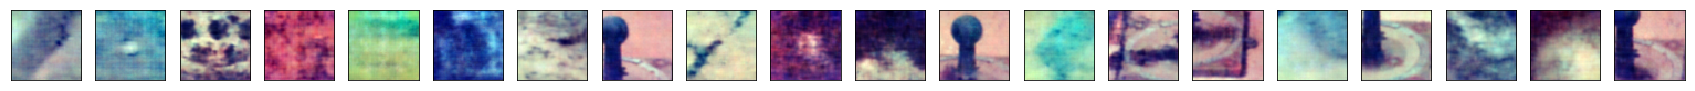

In [53]:
fig, axes = plt.subplots(ncols=N, figsize=(30, 20))
for i, img in enumerate(reconstructions[9]):
    img = np.take(img, [2,0,1], axis=2)
    axes[i].imshow(np.interp(img, (img.min(), img.max()), (0, 1)))
    axes[i].grid(False)
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])

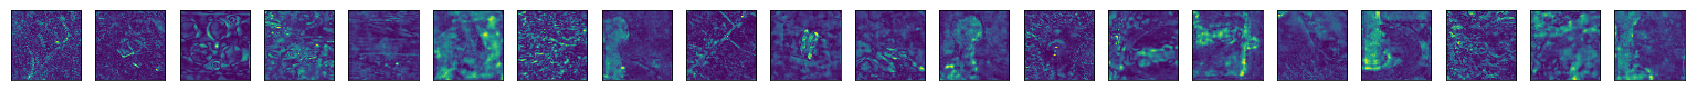

In [54]:
fig, axes = plt.subplots(ncols=N, figsize=(30, 20))
for i, (inp, rec) in enumerate(zip(inputs[:N], reconstructions[:N])):
    img = np.abs(inp-rec)
    img = np.mean(img, axis=2)
    axes[i].imshow(np.interp(img, (img.min(), img.max()), (0, 1)))
    axes[i].grid(False)
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])

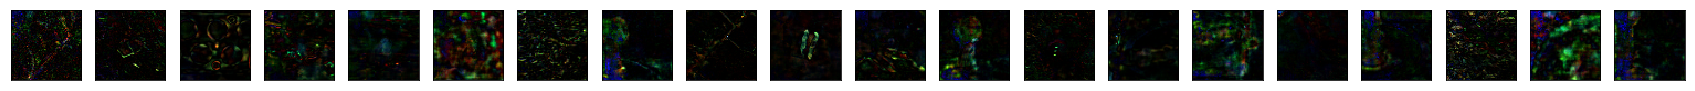

In [55]:
fig, axes = plt.subplots(ncols=N, figsize=(30, 20))
for i, img in enumerate(error_maps[:N]):
    img = np.take(img, [2,0,1], axis=2)
    axes[i].imshow(np.interp(img, (img.min(), img.max()), (0, 1)))
    axes[i].grid(False)
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])

(array([1.20749e+05, 1.59100e+03, 3.45000e+02, 1.18000e+02, 5.40000e+01,
        1.30000e+01, 6.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([2.3283064e-10, 1.5270081e+02, 3.0540161e+02, 4.5810242e+02,
        6.1080322e+02, 7.6350403e+02, 9.1620483e+02, 1.0689056e+03,
        1.2216064e+03, 1.3743073e+03, 1.5270081e+03], dtype=float32),
 <a list of 10 Patch objects>)

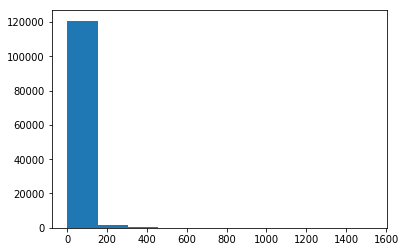

In [48]:
fig, axes = plt.subplots(ncols=N, figsize=(30, 20))
norms = np.linalg.norm(reconstructions)